In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  

In [3]:
# Plot misclassified images
import pandas as pd

def plot_misclasified_examples(x, true_lables, predicted_lables, n=5, print_misclassified=False):
  misclassified_idx = np.where(predicted_lables != true_lables)[0]
  misclassified_random_idxes = np.random.choice(misclassified_idx, n*n)
  plt.figure(figsize=(10,10))
  for i in range(n*n):
      idx = misclassified_random_idxes[i]
      plt.subplot(n,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[idx], cmap='gray')
      plt.xlabel("True  %s, Pred: %s" % (true_lables[idx], predicted_lables[idx]))
  plt.show()

  if print_misclassified:
    print(pd.DataFrame({'idx':misclassified_random_idxes,
                        'true':true_lables[misclassified_random_idxes],
                        'pred':predicted_lables[misclassified_random_idxes]}))



In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


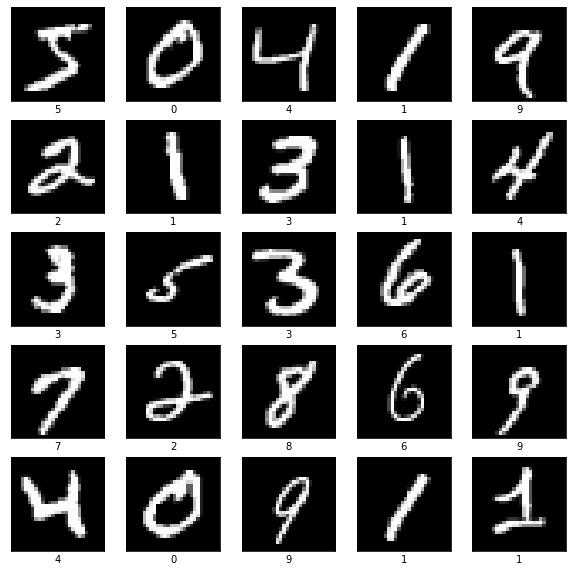

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
%%time

model = tf.keras.Sequential(
    layers=[
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=6)

Epoch 1/6
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3041 - accuracy: 0.9123 - val_loss: 0.1428 - val_accuracy: 0.9581
Epoch 2/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1459 - accuracy: 0.9569 - val_loss: 0.1044 - val_accuracy: 0.9668
Epoch 3/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1096 - accuracy: 0.9666 - val_loss: 0.0883 - val_accuracy: 0.9714
Epoch 4/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0890 - accuracy: 0.9725 - val_loss: 0.0760 - val_accuracy: 0.9761
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.0780 - val_accuracy: 0.9751
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.0712 - val_accuracy: 0.9763
CPU times: user 43.8 s, sys: 3.27 s, total: 47.1 s
Wall time: 50 s


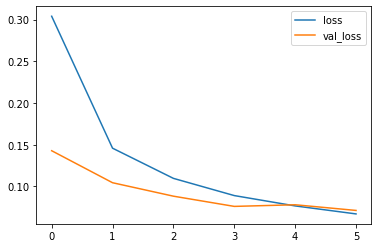

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

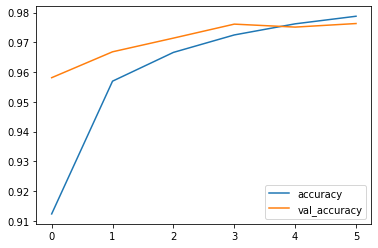

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [10]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0712 - accuracy: 0.9763
[0.07119589298963547, 0.9763000011444092]


Confusion matrix, without normalization
[[ 971    0    1    3    1    0    1    1    1    1]
 [   0 1124    4    2    0    0    2    0    3    0]
 [   4    2 1005    2    5    0    2    5    7    0]
 [   0    0    2  994    0    0    0    6    7    1]
 [   1    1    2    1  961    0    1    1    3   11]
 [   2    0    0   24    2  845    7    1    9    2]
 [   7    3    1    1    5    2  935    1    3    0]
 [   2    1    9    3    1    0    0 1003    4    5]
 [   2    1    3    6    1    1    1    3  955    1]
 [   4    4    0   11    3    0    1    8    8  970]]


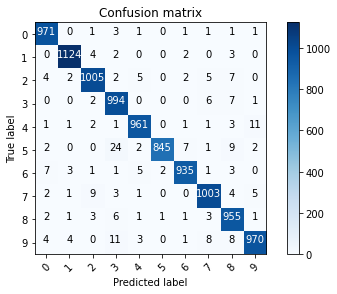

In [11]:
# plot confucion matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

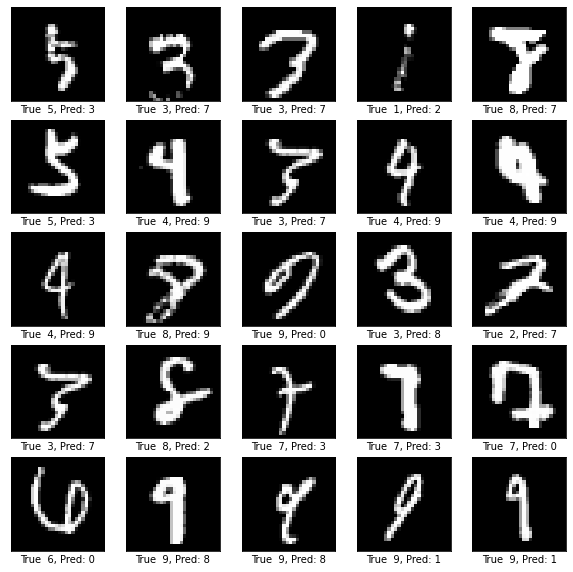

     idx  true  pred
0   3702     5     3
1   5734     3     7
2   1681     3     7
3   6572     1     2
4   1530     8     7
5   9422     5     3
6   8520     4     9
7   4306     3     7
8   2447     4     9
9   8527     4     9
10  1242     4     9
11  6555     8     9
12  4163     9     0
13  6046     3     8
14  9664     2     7
15  4306     3     7
16  5749     8     2
17  4966     7     3
18  2915     7     3
19  5887     7     0
20  3749     6     0
21  1554     9     8
22  4761     9     8
23  2406     9     1
24  2387     9     1


In [12]:
plot_misclasified_examples(x_test, y_test, p_test, print_misclassified=True)